In [1]:
import pandas as pd # dataframe,data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

In [2]:
df = pd.read_csv(r"C:\Users\parag\Desktop\black friday\train.csv") # To read CSV file 

In [3]:
df.head() # TO see first five rows

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#  Data Cleaning

In [4]:
df.isnull().sum() # Now we are going to check any missing value is present in the table or not



User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [5]:
df.shape # from these we can see, we have 550068 rows and 12 columns

(550068, 12)

In [6]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

so available datatypes are int,object and float so we have to focus on object datatypes because we all know it can't fit on machine learning model directly

In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
gender = np.unique(df['Gender'])

In [9]:
gender

array(['F', 'M'], dtype=object)

From above, we don't have any other type present in the Gender column, so we can convert F = 0 and M = 1  

In [10]:
def new_gender(gender):
    if gender == 'M':
        return 1
    else:
        return 0

In [11]:
df["Gender"] = df["Gender"].apply(new_gender)

after played with Gender, now it times to play with Age column

In [12]:
age = np.unique(df['Age'])

In [13]:
age

array(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
      dtype=object)

In the age columns we have different age range people, so we have to assign them a numeric value

In [14]:
def new_age(age):
    if age =='0-17':
        return 0
    elif age =='18-25':
        return 1
    elif age =='26-35':
        return 2
    elif age =='36-45':
        return 3
    elif age =='46-50':
        return 4
    elif age =='51-55':
        return 5
    else:
        return 6

In [15]:
df["Age"] = df['Age'].apply(new_age)

now we have to take care of City_Category

In [16]:
city_category = np.unique(df['City_Category'])

In [17]:
city_category

array(['A', 'B', 'C'], dtype=object)

as we see city_category has three category, so let's convert it into no.

In [18]:
def new_city_category(city_category):
    if city_category == 'A':
        return 0
    elif city_category == 'B':
        return 1
    else:
        return 2

In [19]:
df['City_Category'] = df['City_Category'].apply(new_city_category)

now the Last one object column is remaining to convert is Stay_In_Current_City_Years 

In [20]:
stay_in_ccy = np.unique(df['Stay_In_Current_City_Years'])

In [21]:
stay_in_ccy

array(['0', '1', '2', '3', '4+'], dtype=object)

In [22]:
def new_stay_in_ccy(stay_in_ccy):
    if stay_in_ccy == '4+':
        return 4
    else:
        return int(stay_in_ccy)

In [23]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].apply(new_stay_in_ccy)

we have User_ID and Product_ID in our table, but they have no use so we can drop these two columns

In [24]:
df.drop(['User_ID','Product_ID'], inplace = True, axis = 1)

In [25]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,NaN,NaN,8370
1,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,0,10,0,2,0,12,NaN,NaN,1422
3,0,0,10,0,2,0,12,14.0,NaN,1057
4,1,6,16,2,4,0,8,NaN,NaN,7969


In [26]:
# df.Product_Category_1.replace(np.nan,0, inplace = True)
# df.Product_Category_1.replace(np.nan,0, inplace = True)

now we have to take care with NaN values, so that we have to first replace NaN values with 0 

In [27]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,NaN,NaN,8370
1,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,0,10,0,2,0,12,NaN,NaN,1422
3,0,0,10,0,2,0,12,14.0,NaN,1057
4,1,6,16,2,4,0,8,NaN,NaN,7969


In [28]:
from sklearn.preprocessing import Imputer

In [29]:
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(df.iloc[:, 7:9].values)
df.iloc[:,7:9] = imputer.transform(df.iloc[:, 7:9].values)


C:\Users\parag\ana\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [30]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,9.842329,12.668243,8370
1,0,0,10,0,2,0,1,6.000000,14.000000,15200
2,0,0,10,0,2,0,12,9.842329,12.668243,1422
3,0,0,10,0,2,0,12,14.000000,12.668243,1057
4,1,6,16,2,4,0,8,9.842329,12.668243,7969


# Data Visualization

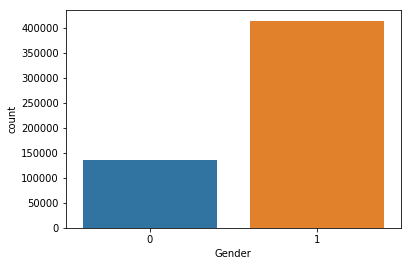

In [31]:
sns.countplot(df['Gender'])

we observe from above, Male Gender purchase more product during black friday than female but we can't say that Male are bought for himself or his wife,children etc.

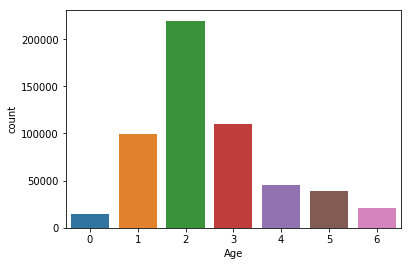

In [32]:
sns.countplot(df['Age'])

plotting a countplot for age,seems like the majority of population in the age group 26-35 most attend the sale during black friday

Further, I could also check among the age groups, which gender was a majority by adding a hue. And as seen below, more males spent in the sale than females

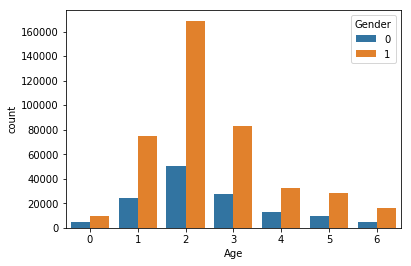

In [34]:
sns.countplot(df['Age'], hue=df['Gender'])

C:\Users\parag\ana\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


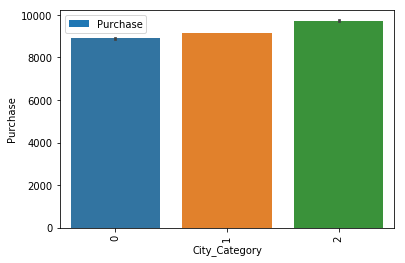

In [36]:
df[['City_Category','Purchase']].groupby('City_Category').mean().plot.bar()
sns.barplot('City_Category', 'Purchase', data = df)
plt.show()

we can see that from City_Category 2 or you can call City_Category_C people Purchase more product 

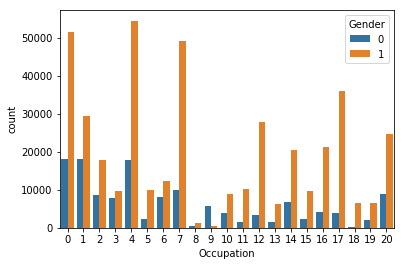

In [39]:
sns.countplot(df['Occupation'], hue= df["Gender"])

From above we can say that Occupation is doesn't matter during black friday sale, because product are damn cheap so everyone can buy 

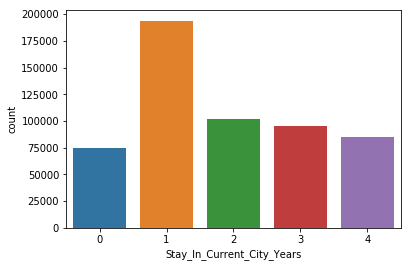

In [42]:
sns.countplot(df['Stay_In_Current_City_Years'])

it doesn't matter wheter person stay in current city from long back ago or recently shift to the city , they gonna buy during the black friday sale because all are damn cheap

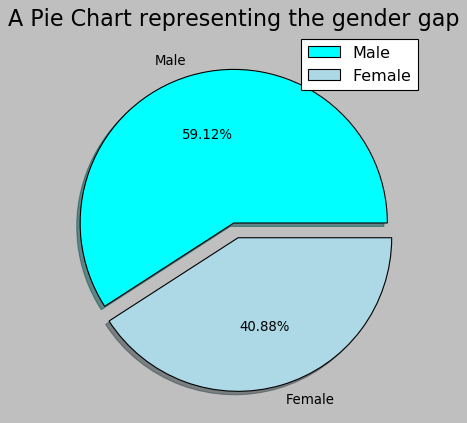

In [46]:
# pie chart 

size = [317817, 219760]
labels = ['Male', 'Female']
colors = ['cyan', 'lightblue']
explode = [0, 0.1]

plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.legend()
plt.show()


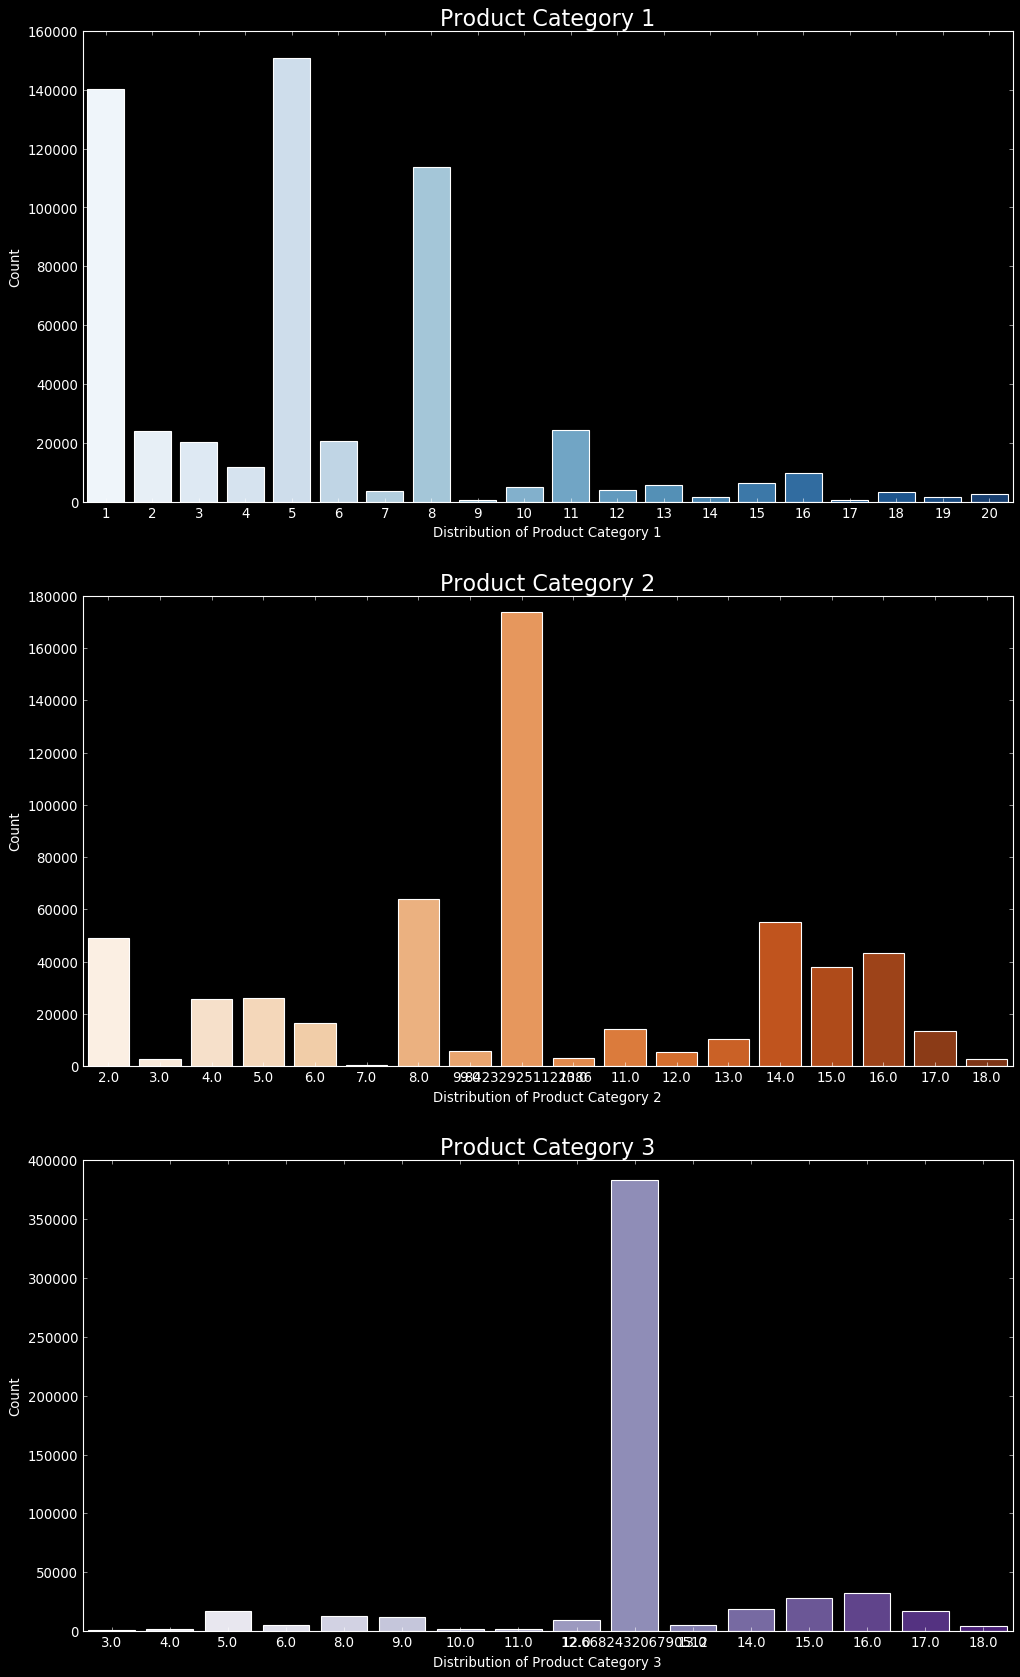

In [47]:
# visualizing the different product categories

plt.rcParams['figure.figsize'] = (15, 25)
plt.style.use('dark_background')

plt.subplot(3, 1, 1)
sns.countplot(df['Product_Category_1'], palette = 'Blues')
plt.title('Product Category 1', fontsize = 20)
plt.xlabel('Distribution of Product Category 1')
plt.ylabel('Count')

plt.subplot(3, 1, 2)
sns.countplot(df['Product_Category_2'], palette = 'Oranges')
plt.title('Product Category 2', fontsize = 20)
plt.xlabel('Distribution of Product Category 2')
plt.ylabel('Count')

plt.subplot(3, 1, 3)
sns.countplot(df['Product_Category_3'], palette = 'Purples')
plt.title('Product Category 3', fontsize = 20)
plt.xlabel('Distribution of Product Category 3')
plt.ylabel('Count')

plt.show()


# Data Preprocessing 

In [48]:
X = df.drop(['Purchase'],axis=1)

In [49]:
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,10,0,2,0,3,9.842329,12.668243
1,0,0,10,0,2,0,1,6.000000,14.000000
2,0,0,10,0,2,0,12,9.842329,12.668243
3,0,0,10,0,2,0,12,14.000000,12.668243
4,1,6,16,2,4,0,8,9.842329,12.668243


In [50]:
y = df['Purchase']

In [51]:
y.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [52]:
X.shape

(550068, 9)

In [53]:
y.shape

(550068,)

In [81]:
# train test split
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report, mean_squared_error,r2_score



In [82]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=42)

In [83]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

C:\Users\parag\ana\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\parag\ana\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\parag\ana\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


# Linear Regression

In [84]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [85]:
y_pred = linreg.predict(x_test)

In [86]:
y_pred

array([12830.26231043, 10602.56698977,  7001.54980096, ...,
       10819.00405398, 11172.75244379,  9355.54143133])

In [87]:
rsquare = linreg.score(x_test, y_test)
print(rsquare)

0.12673490956215439


In [88]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) 


In [89]:
# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)

In [90]:
print(rmse)
print(r2)

4691.296955748704
0.12673490956215439


# Ridge Regression

In [91]:

model = Ridge()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4691.296929538546
R2 Score: 0.12673491931997471


# Elastic Net Regression

In [92]:

model = ElasticNet()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4721.279873864806
R2 Score: 0.11553685231672195


# Lasso Regression

In [93]:
model = Lasso()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4691.301981089392
R2 Score: 0.12673303866931496


# Gredient Boosting Regression

In [94]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2, learning_rate = 0.1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 2941.4271910791063
R2 Score: 0.6566979031207854


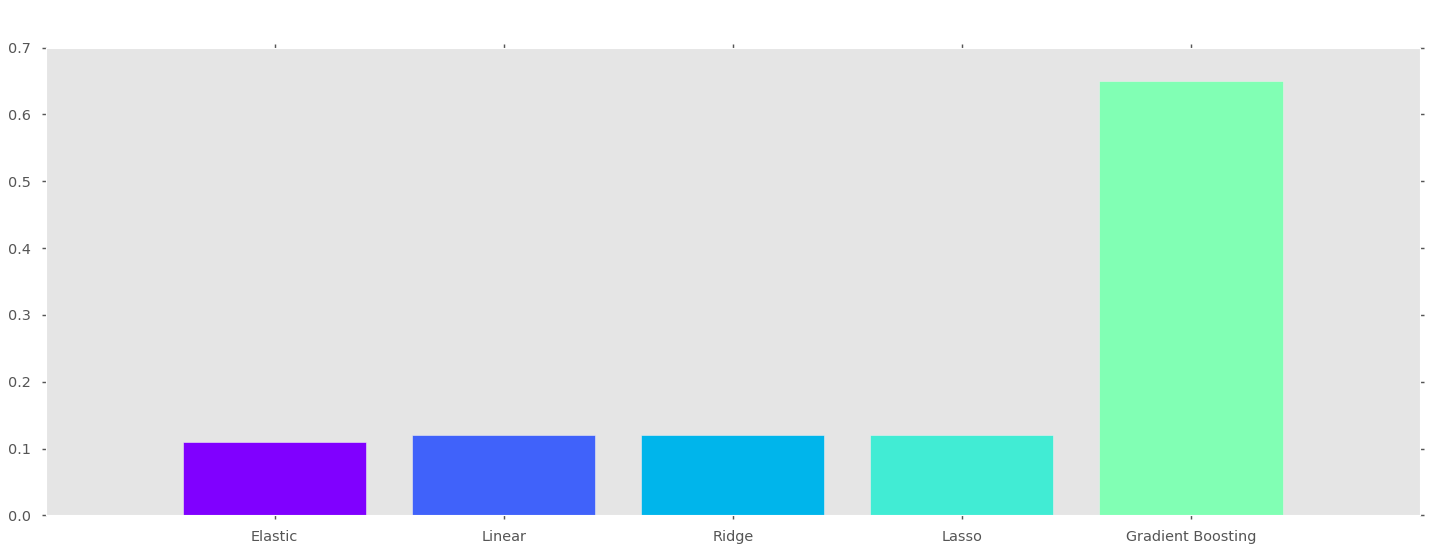

In [103]:
r2_score = np.array([0.12, 0.12, 0.11, 0.12, 0.65])
labels = np.array(['Linear','Ridge', 'Elastic', 'Lasso', 'Gradient Boosting'])
indices = np.argsort(r2_score)
color = plt.cm.rainbow(np.linspace(0, 1, 9))

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 7)
plt.bar(range(len(indices)), r2_score[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
plt.title('R2 Score', fontsize = 40)
plt.grid()
plt.tight_layout()
plt.show()

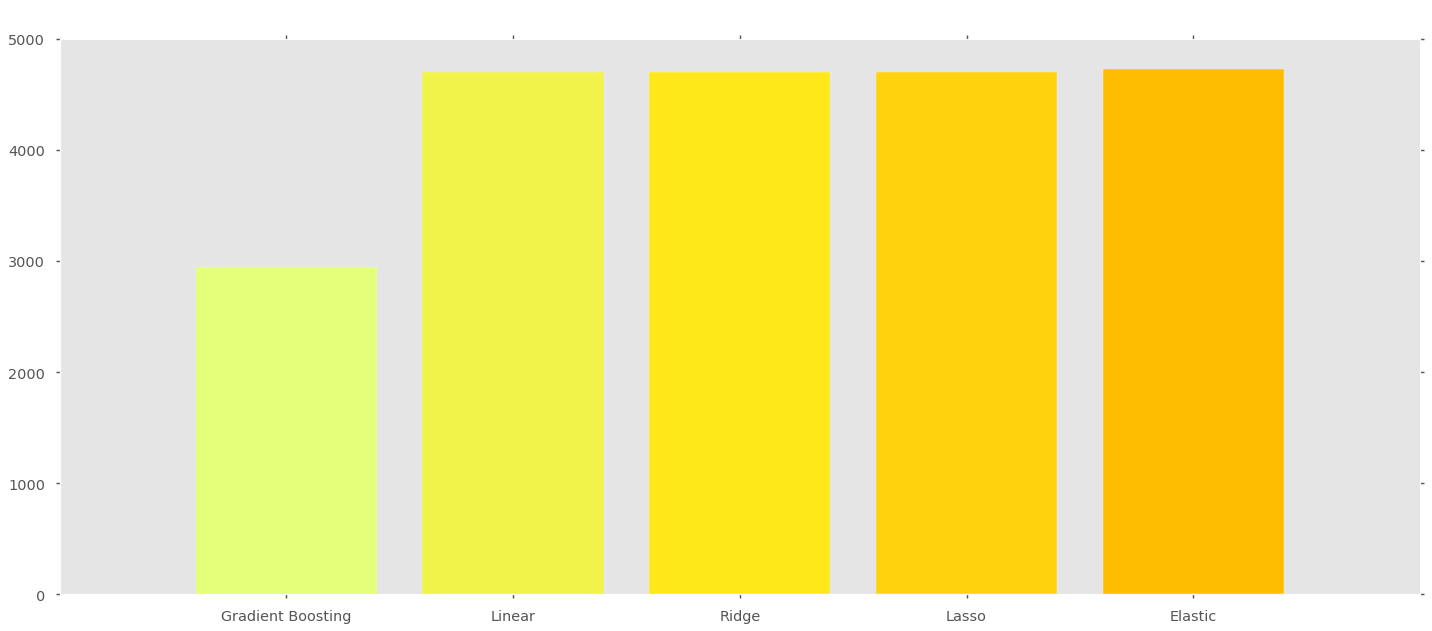

In [102]:
r2_score = np.array([4695,4695, 4723, 4695, 2941])
labels = np.array(['Linear','Ridge', 'Elastic', 'Lasso', 'Gradient Boosting'])
indices = np.argsort(r2_score)
color = plt.cm.Wistia(np.linspace(0, 1, 9))

plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (18, 8)
plt.bar(range(len(indices)), r2_score[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
plt.title('R2 Score', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()